In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data into dataframe

df= pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


#### Let us draw a scatter plot to see the relationship between the area and the price values. This can be done using the scatterplot() function of the seaborn module - 

<Axes: xlabel='area', ylabel='price'>

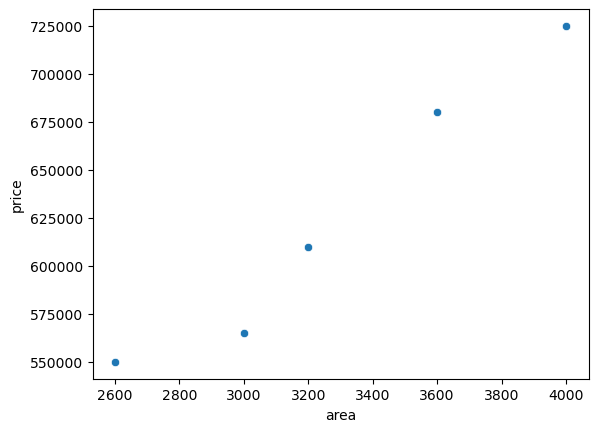

In [3]:
#plot a scatter plot
sns.scatterplot(data=df, x='area', y='price')

#### We can understand by observing the dots in the scatter plot that they can be connected more or less using a straight line. Hence we can apply a Simple Linear Regression ML model on this. We make this model available to us in the form of a 'reg' object. We can now call any methods od the LinearRegression class usinf this object 'reg'.

#### Now the next step is to train the ML model, by calling 'fit()' method on the data - 

##### reg.fit(x,y)
Here, 'x' indicates independent variable i.e df.area. This should be supplied in the form of 2D array to the fit() method. 'y' indicates the dependent variable, i.e - df.price.

Now the question is - How to convert the df.area column data into a 2D array ? Well there are 2 ways - the first way is to convert the df.area column into an array by using values attribute as - 
##### df.area.values #gives 1D array

Now convert the 1D into a 2D array by using reshape() method of numpy arrays as - 
##### df.area.values.reshape(-1,1) #gives 2D array

In [4]:
reg = LinearRegression()
df.area.values #gives 1D array

array([2600, 3000, 3200, 3600, 4000])

In [5]:
df.area.values.reshape(-1,1)

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000]])

In [6]:
#Another way of converting the df.area value into a 2D array is to take the 'area' column name inside [[ ]]
reg.fit(df[['area']], df.price) #fitting means training

LinearRegression()

#### Fitting means the model has been trained with data, which means that the model tried to fit the data in the form of a straight line. This indicates that there is a linear relationship existing between the 'area' and 'price' columns.
#### Now let us test it with a data that is not there in the dataset -

In [7]:
#predict the price of a 3500 sqft house
reg.predict([[3500]])

array([655873.28767123])

In [8]:
#find the coefficient, this is slope m
reg.coef_

array([135.78767123])

In [9]:
#find the intercept, this is b
reg.intercept_

180616.43835616432

In [10]:
# if we substitute m and b values in y=mx+b,
# we get the predicted value as above

y=135.78767123*3500 + 180616.43835616432
y

655873.2876611643

##### Trying for another value - for 5000 sqft area

In [11]:
reg.predict([[5000]])

array([859554.79452055])

### Finding the accuracy level of the model by finding r squared values

In [12]:
from sklearn.metrics import r2_score

y_original = df.price
y_predicted = reg.predict(df[['area']])

R_square = r2_score(y_original, y_predicted)
print('r squared value', R_square)

r squared value 0.9584301138199486


#### r-squared value is 0.95843... , hence indicating a 95.8% accuracy for this model which is quite good. 
#### Let us check the scatter plot with a regression line using lmplot(). lmplot() will draw the straight line that best fits the data points.

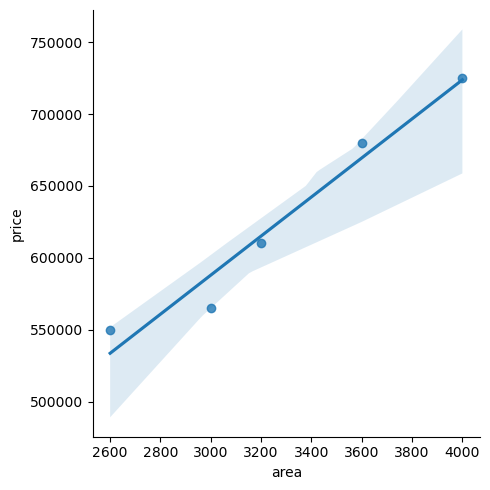

In [13]:
sns.lmplot(data=df, x='area', y='price')